In [28]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [29]:
df = pd.read_csv("smoking-v1.csv")

In [30]:
df

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38.0,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42.0,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40.0,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,NaN,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39.0,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1686,Male,22.0,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,Female,49.0,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,Male,45.0,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,Female,51.0,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


<Axes: >

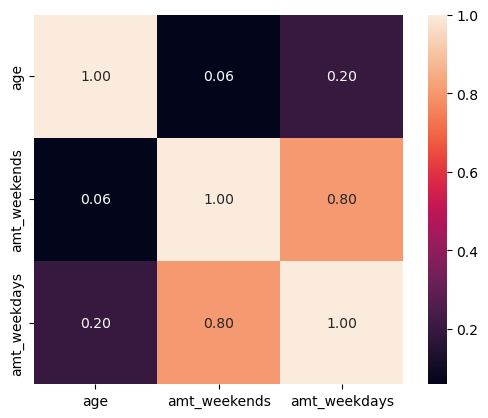

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)

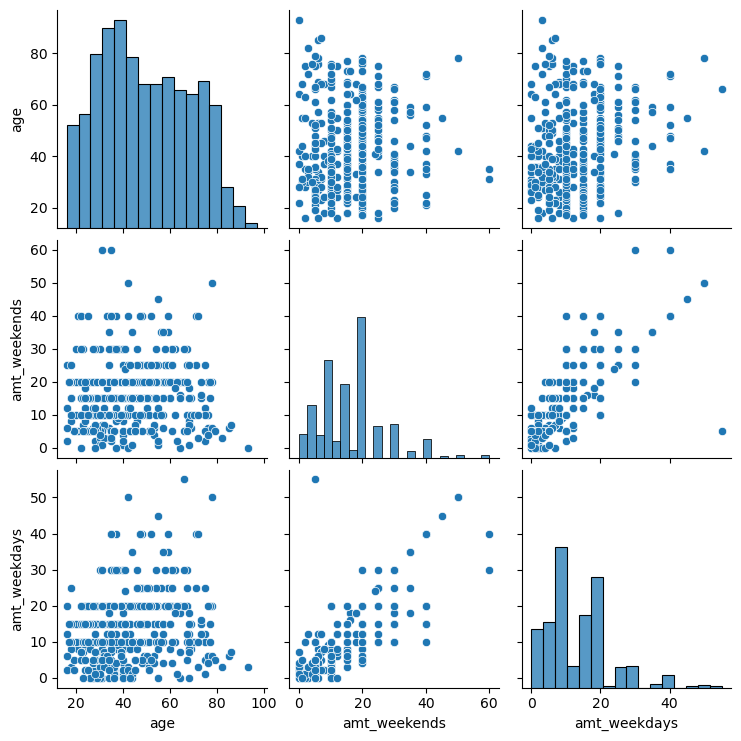

In [32]:
sns.pairplot(df)

In [33]:
df.isnull().sum()

gender                      0
age                        98
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income               75
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

In [34]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
df["gender"] = df["gender"].map({"Female": 0, "Male": 1})

In [36]:
df["marital_status"].unique()

array(['Divorced', 'Single', 'Married', 'Widowed', 'Separated'],
      dtype=object)

In [37]:
df = pd.concat([df, pd.get_dummies(df["marital_status"])], axis=1)
df.drop(columns=["marital_status"], axis=1, inplace=True)

In [38]:
df["highest_qualification"].unique()

array(['No Qualification', 'Degree', 'GCSE/O Level', 'GCSE/CSE',
       'Other/Sub Degree', 'Higher/Sub Degree', 'ONC/BTEC', 'A Levels'],
      dtype=object)

In [39]:
categories = [
    "No Qualification",
    "GCSE/CSE",
    "GCSE/O Level",
    "ONC/BTEC",
    "A Levels",
    "Other/Sub Degree",
    "Higher/Sub Degree",
    "Degree",
]

encoder = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=np.nan)
df[["highest_qualification"]] = encoder.fit_transform(df[["highest_qualification"]])

In [40]:
df["nationality"].unique()

array(['British', 'English', 'Scottish', 'Other', 'Welsh', 'Irish',
       'Refused', 'Unknown'], dtype=object)

In [41]:
df = pd.concat([df, pd.get_dummies(df["nationality"])], axis=1)
df.drop(columns=["nationality"], axis=1, inplace=True)

In [42]:
df["ethnicity"].unique()

array(['White', 'Mixed', 'Black', 'Refused', 'Asian', 'Chinese',
       'Unknown'], dtype=object)

In [43]:
df = pd.concat([df, pd.get_dummies(df["ethnicity"])], axis=1)
df.drop(columns=["ethnicity"], axis=1, inplace=True)

In [44]:
df["gross_income"].unique()

array(['2,600 to 5,200', 'Under 2,600', '28,600 to 36,400',
       '10,400 to 15,600', '15,600 to 20,800', 'Above 36,400',
       '5,200 to 10,400', 'Refused', '20,800 to 28,600', 'Unknown', nan],
      dtype=object)

In [45]:
categories = [
    "Under 2,600",
    "2,600 to 5,200",
    "5,200 to 10,400",
    "10,400 to 15,600",
    "15,600 to 20,800",
    "20,800 to 28,600",
    "28,600 to 36,400",
    "Above 36,400",
]

encoder = OrdinalEncoder(
    categories=[categories],
    handle_unknown="use_encoded_value",
    unknown_value=np.nan
)

df[["gross_income"]] = encoder.fit_transform(df[["gross_income"]])

In [46]:
df["region"].unique()

array(['The North', 'Midlands & East Anglia', 'London', 'South East',
       'South West', 'Wales', 'Scotland'], dtype=object)

In [47]:
df = pd.concat([df, pd.get_dummies(df["region"])], axis=1)
df.drop(columns=["region"], axis=1, inplace=True)

In [48]:
df.isnull().sum()

gender                       0
age                         98
highest_qualification        0
gross_income               197
smoke                        0
amt_weekends              1270
amt_weekdays              1270
type                      1270
Divorced                     0
Married                      0
Separated                    0
Single                       0
Widowed                      0
British                      0
English                      0
Irish                        0
Other                        0
Refused                      0
Scottish                     0
Unknown                      0
Welsh                        0
Asian                        0
Black                        0
Chinese                      0
Mixed                        0
Refused                      0
Unknown                      0
White                        0
London                       0
Midlands & East Anglia       0
Scotland                     0
South East                   0
South We

In [49]:
df.drop(columns=["amt_weekends", "amt_weekdays", "type"], axis=1, inplace=True)

In [50]:
df["age"] = df["age"].fillna(df["age"].median())

In [51]:
df["gross_income"] = df["gross_income"].fillna(df["gross_income"].mode()[0])

In [52]:
X, y = df.drop(columns=["smoke"]), df["smoke"]

In [53]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
classifier = LogisticRegression().fit(train_X, train_y)

e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
pred_y = classifier.predict(test_X)

In [56]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          No       0.77      0.97      0.86       258
         Yes       0.44      0.09      0.14        81

    accuracy                           0.76       339
   macro avg       0.60      0.53      0.50       339
weighted avg       0.69      0.76      0.69       339



In [58]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
).fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          No       0.80      0.93      0.86       258
         Yes       0.53      0.26      0.35        81

    accuracy                           0.77       339
   macro avg       0.66      0.59      0.60       339
weighted avg       0.73      0.77      0.74       339

